<a href="https://colab.research.google.com/github/LcLnAinIng/California-Housing-Data/blob/main/California_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read ME

This is a housing data in California. Each row is the information about the houses in a block.\
The following are the description of the features:

* longitude: A measure of how far west a house is; a higher value is farther west
* latitude: A measure of how far north a house is; a higher value is farther north
* housingMedianAge: Median age of a house within a block; a lower number is a newer building
* totalRooms: Total number of rooms within a block
* totalBedrooms: Total number of bedrooms within a block
* population: Total number of people residing within a block
* households: Total number of households, a group of people residing within a home unit, for a block
* medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
* medianHouseValue: Median house value for households within a block (measured in US Dollars)
* oceanProximity: Location of the house w.r.t ocean/sea


I aim to learn about what causes the value of the houses in a block.\
And so I studied about the relationship between medianHouseValue and other features. (Data Analysis)\
I first used Regression models, and feature importance to describe the relationship and see which features provide more impact.\
In order to save computational cost and avoid confusion, I dropped some features such as Longitude and Latitude.\
Afterward, I trained several models, such as Random Forest Regressor, MLP, and LSTM, to demonstrate whether, given the demographic data of a block, I could estimate the value of the houses there. (Machine Learning & Deep Learning)

I also wish to understand the dynamic of the housing situation in California.\
I applied some statistics techniques such as p-value and Bootstrapping in order to have enough amount of sample for analysis.

# Enviroment Setup

In [ ]:
!pip install statsmodels

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score
import statsmodels.api as sm

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Normalization, Dropout, LSTM, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import layers
from tensorflow.keras import regularizers

import random
random.seed(42)
import warnings
warnings.filterwarnings('ignore') # suppress warnings

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cal = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Practice California/california-housing-data.csv")
cal

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## Check the dataset

In [ ]:
cal.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
cal = cal.dropna(axis = 0)
cal

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
cal.duplicated().sum()

0

There is no duplicated instance.

#### using Regression Model to describe the relationship between value and other features

In [ ]:
X_full = cal.drop(['median_house_value'], axis = 1)
y = cal['median_house_value']

label_encoder = LabelEncoder()
X_full["ocean_proximity"] = label_encoder.fit_transform(X_full["ocean_proximity"])

# # Standardize all columns except longitude and latitude
# scaler = StandardScaler()
# columns_to_standardize = X.columns.difference(["longitude", "latitude"])
# X[columns_to_standardize] = scaler.fit_transform(X[columns_to_standardize])

# Display processed dataset head
X_full

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,3
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,1


In [ ]:
regression_model = LinearRegression()

regression_model.fit(X_full, y)
regression_model.coef_

array([-4.27483234e+04, -4.25218221e+04,  1.15803286e+03, -8.24441591e+00,
        1.13832886e+02, -3.83955226e+01,  4.76869148e+01,  4.02947721e+04,
       -3.22434654e+01])

As standardizing
From the Regresion, we could conclude the following:
* Longitude, Ladtitude, and median income do not really important as their magnitude is very small that tence to 0.
* Total room of the house is the most important feature as it has the biggest magnitude, while giving a negative impact to the house value. This is somewhat weird.
* This regression is not doing well as each coefficient are small. \
\
I thought to standardize the dataset but not longitude and laditude as that is weird. But then the magnitude of them would be way much larger than the other features, which causes some statistical issue. So I end up not standardizing anything.

In [ ]:
# check the p_value
X_sm = sm.add_constant(X_full)
ols_model = sm.OLS(y, X_sm).fit()
ols_model.pvalues

,0
const,0.000000e+00
longitude,0.000000e+00
latitude,0.000000e+00
housing_median_age,4.217493e-154
total_rooms,4.850763e-25
total_bedrooms,3.292396e-60
population,6.963904e-264
households,2.715560e-10
median_income,0.000000e+00
ocean_proximity,9.303556e-01


Conclusion of the p_value (set 0.05 as significant level):
* Due to lack of standardization, longitude and latitude are the most significant, which is pretty nonsense.
* Otherwise, median income, population, and housing age are the most significant features.
* ocean_proximity is statistically insignificant.

In [ ]:
RFR = RandomForestRegressor()
RFR.fit(X_full, y)
im = RFR.feature_importances_
# for i,v in enumerate(im):
# 	print('Feature: %0d, Score: %.5f' % (i,v))

for name, score in zip(X_full.columns, im):
    print(f'{name} - {np.round(score, 3)}')

longitude - 0.111
latitude - 0.113
housing_median_age - 0.053
total_rooms - 0.025
total_bedrooms - 0.022
population - 0.032
households - 0.019
median_income - 0.513
ocean_proximity - 0.113


From the feature importance with non-standardized dataset:
* Median income contributes to the model's prediction the most.

#### Ignoring longitude and latitude

In [ ]:
cal_descriptive = cal.drop(['longitude', 'latitude'], axis=1)
cal_descriptive["ocean_proximity"] = label_encoder.fit_transform(cal_descriptive["ocean_proximity"])

X_descriptive = cal_descriptive.drop(['median_house_value'], axis = 1)
y_descriptive = cal_descriptive['median_house_value']

z_scaler = StandardScaler()

X_descriptive = (X_descriptive - X_descriptive.mean()) / X_descriptive.std()
y_descriptive = (y_descriptive - y_descriptive.mean()) / y_descriptive.std()

X_descriptive

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,0.982139,-0.803793,-0.970301,-0.973296,-0.976809,2.345106,1.291319
1,-0.606195,2.042080,1.348243,0.861318,1.670332,2.332575,1.291319
2,1.855723,-0.535176,-0.825541,-0.819749,-0.843406,1.782896,1.291319
3,1.855723,-0.623495,-0.718750,-0.765037,-0.733544,0.932947,1.291319
4,1.855723,-0.461959,-0.611959,-0.758860,-0.628914,-0.013143,1.291319
...,...,...,...,...,...,...,...
20635,-0.288528,-0.444570,-0.388886,-0.511774,-0.443196,-1.216697,-0.116998
20636,-0.844446,-0.887535,-0.920466,-0.943292,-1.008198,-0.692027,-0.116998
20637,-0.923862,-0.175038,-0.125468,-0.368817,-0.173773,-1.143143,-0.116998
20638,-0.844446,-0.355336,-0.305826,-0.603549,-0.393497,-1.055110,-0.116998


In [ ]:
regression_model.fit(X_descriptive, y_descriptive)
regression_model.coef_

array([ 0.19888289, -0.3836511 ,  0.37388245, -0.32961701,  0.40079907,
        0.7877644 ,  0.05370167])

This time the dataset is standardized.\
This Regression is way much better than the last one. We could conclude the following:
* Median income impacts the median house price the most, with a positive affect. Which makes sense as richer household are more able to afford an expensive house.
* It is still weird that more rooms would decrease the price.

In [ ]:
# check the p_value
X_descriptive_sm = sm.add_constant(X_descriptive)
ols_model = sm.OLS(y, X_descriptive_sm).fit()
ols_model.pvalues

,0
const,0.000000e+00
housing_median_age,0.000000e+00
total_rooms,1.990325e-127
total_bedrooms,2.482359e-42
population,1.049425e-175
households,1.327041e-50
median_income,0.000000e+00
ocean_proximity,1.334754e-30


Conclusion of p-values:
* Median_income and housing age are the most significant, aligns with the previous p-value test.
* every feature here are significant.

In [ ]:
# standardized dataset
RFR.fit(X_descriptive, y)
im_sm = RFR.feature_importances_
for name, score in zip(X_descriptive.columns, im_sm):
    print(name, np.round(score, 3))

housing_median_age 0.082
total_rooms 0.051
total_bedrooms 0.069
population 0.09
households 0.05
median_income 0.543
ocean_proximity 0.116


Conclusion of feature importance:
* Median income is still the most impactful feature.
* Housing age is less important here.
* The second impactful feature is Ocean_approximity.

#### using Correlation Heatmap to see the relationship between features

<Axes: >

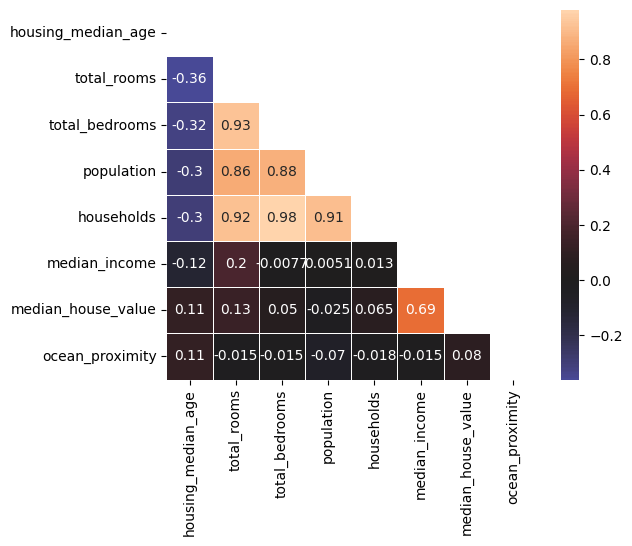

In [ ]:
corr = cal_descriptive.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, annot=True, mask = mask, center = 0, linewidths=0.5, square=True)


From the heatmap, we could conclude the following points:
* It is certain that total_bedrooms and total_rooms has high correlation as bedroom us usually the room has the most amount in a house.
* Total_rooms and households has a high correlation as well, which indicates that larger households need more rooms.
* Places with larger population tend to have more household.
* Noticably, households with higher income tend to get a more expensive price.
* More rooms does not nessecerily means a house worth more.

#### Conclusion from the Linear Regression and Feature Importance
* Income is the most impactful feature to the house value.
* The amount of rooms does not relate to the house value much, but should be a postive impact, according to the correlation.

## Let's delve into the attributes of the house and the buyer

In [ ]:
cal_attr = cal_descriptive.drop(['population', 'households'], axis = 1)
cal_attr

,housing_median_age,total_rooms,total_bedrooms,median_income,median_house_value,ocean_proximity
0,41.0,880.0,129.0,8.3252,452600.0,3
1,21.0,7099.0,1106.0,8.3014,358500.0,3
2,52.0,1467.0,190.0,7.2574,352100.0,3
3,52.0,1274.0,235.0,5.6431,341300.0,3
4,52.0,1627.0,280.0,3.8462,342200.0,3
...,...,...,...,...,...,...
20635,25.0,1665.0,374.0,1.5603,78100.0,1
20636,18.0,697.0,150.0,2.5568,77100.0,1
20637,17.0,2254.0,485.0,1.7000,92300.0,1
20638,18.0,1860.0,409.0,1.8672,84700.0,1


In [ ]:
cal_attr.describe()

,housing_median_age,total_rooms,total_bedrooms,median_income,median_house_value,ocean_proximity
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,28.633094,2636.504233,537.870553,3.871162,206864.413155,1.166153
std,12.591805,2185.269567,421.385070,1.899291,115435.667099,1.420135
min,1.000000,2.000000,1.000000,0.499900,14999.000000,0.000000
25%,18.000000,1450.000000,296.000000,2.563700,119500.000000,0.000000
50%,29.000000,2127.000000,435.000000,3.536500,179700.000000,1.000000
75%,37.000000,3143.000000,647.000000,4.744000,264700.000000,1.000000
max,52.000000,39320.000000,6445.000000,15.000100,500001.000000,4.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x7a1aeadea0d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7a1aea9c95d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a1ae68c9750>,
 'medians': [<matplotlib.lines.Line2D at 0x7a1ae68d8510>,
 'fliers': [<matplotlib.lines.Line2D at 0x7a1ae68d9050>,
 'means': []}

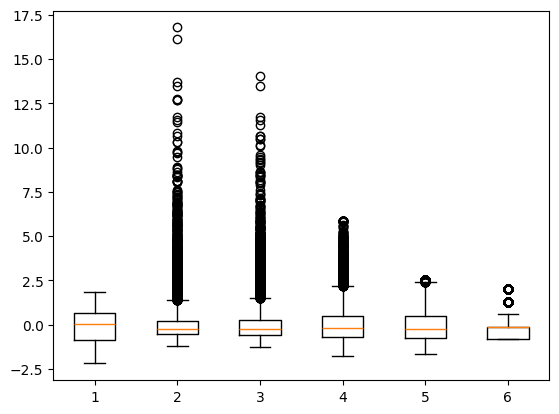

In [ ]:
cal_attr_z = (cal_attr - cal_attr.mean())/cal_attr.std()
plt.boxplot(cal_attr_z)

What is happening with the area with only one total_bedrooms?

In [ ]:
cal[cal['total_bedrooms'] == 1]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
16171,-122.5,37.79,52.0,8.0,1.0,13.0,1.0,15.0001,500001.0,NEAR BAY


In [ ]:
cal[cal['housing_median_age'] == 1]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
3130,-117.95,35.08,1.0,83.0,15.0,32.0,15.0,4.8750,141700.0,INLAND
12286,-116.95,33.86,1.0,6.0,2.0,8.0,2.0,1.6250,55000.0,INLAND
18972,-122.00,38.23,1.0,2062.0,343.0,872.0,268.0,5.2636,191300.0,INLAND
19536,-120.93,37.65,1.0,2254.0,328.0,402.0,112.0,4.2500,189200.0,INLAND


In [ ]:
cal[cal['median_income'] == cal['median_income'].min()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
73,-122.29,37.81,46.0,12.0,4.0,18.0,7.0,0.4999,67500.0,NEAR BAY
3249,-119.99,36.09,23.0,333.0,92.0,198.0,55.0,0.4999,100000.0,INLAND
3258,-122.89,39.42,16.0,411.0,114.0,26.0,19.0,0.4999,73500.0,INLAND
4861,-118.28,34.02,29.0,515.0,229.0,2690.0,217.0,0.4999,500001.0,<1H OCEAN
5213,-118.28,33.93,52.0,117.0,33.0,74.0,45.0,0.4999,90600.0,<1H OCEAN
6343,-117.75,34.06,52.0,62.0,9.0,44.0,16.0,0.4999,112500.0,INLAND
6688,-118.08,34.15,28.0,238.0,58.0,142.0,31.0,0.4999,500001.0,INLAND
7125,-118.04,33.90,36.0,15.0,5.0,15.0,6.0,0.4999,162500.0,<1H OCEAN
13999,-116.90,34.69,10.0,337.0,102.0,108.0,50.0,0.4999,55000.0,INLAND
19523,-121.01,37.65,52.0,178.0,53.0,152.0,62.0,0.4999,82500.0,INLAND


# Analyse the data with ocean as section

In [ ]:
cal['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

### Near Bay

In [ ]:
near_bay = cal[cal['ocean_proximity'] == 'NEAR BAY']
near_bay

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
19067,-122.45,38.28,20.0,3306.0,503.0,1374.0,460.0,5.7984,297600.0,NEAR BAY
19068,-122.47,38.29,14.0,3732.0,846.0,1277.0,775.0,2.5658,208000.0,NEAR BAY
19069,-122.45,38.27,25.0,5024.0,881.0,1994.0,838.0,4.2237,262300.0,NEAR BAY
19077,-122.49,38.27,8.0,5092.0,988.0,1657.0,936.0,3.5625,213200.0,NEAR BAY


In [ ]:
near_bay = near_bay.drop(columns=['longitude', 'latitude', 'ocean_proximity'], axis = 1)
near_bay

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...
19067,20.0,3306.0,503.0,1374.0,460.0,5.7984,297600.0
19068,14.0,3732.0,846.0,1277.0,775.0,2.5658,208000.0
19069,25.0,5024.0,881.0,1994.0,838.0,4.2237,262300.0
19077,8.0,5092.0,988.0,1657.0,936.0,3.5625,213200.0


In [ ]:
# bootstrap to make more samples

# Bootstrap parameters
n_bootstrap = 10000  # Number of bootstrap samples
bootstrap_means = []

# Perform bootstrap resampling
for _ in range(n_bootstrap):
    sample = near_bay.sample(frac=1, replace=True)  # Resample with replacement
    bootstrap_means.append(sample.mean())

# Convert results to DataFrame
near_bay_bootstrap_means_df = pd.DataFrame(bootstrap_means)
near_bay_bootstrap_means_df

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.623348,2585.329956,528.251101,1262.943172,500.260352,4.198944,260214.352863
1,37.524670,2453.661674,503.896035,1213.950661,477.012775,4.148354,254769.679736
2,37.497797,2504.373568,517.014097,1237.674890,491.139648,4.156543,257841.974890
3,38.037885,2481.704405,511.330396,1222.645374,485.294273,4.191824,262607.974449
4,37.636123,2467.272687,508.520705,1211.143172,482.848018,4.178761,259780.829956
...,...,...,...,...,...,...,...
9995,37.659031,2462.935242,514.835683,1223.792070,488.391630,4.150281,261687.930396
9996,37.480176,2506.548018,517.245815,1242.022907,491.165198,4.215610,260097.175330
9997,37.317621,2562.862996,525.281057,1253.247137,497.592511,4.202035,257918.809692
9998,37.773128,2471.288546,506.353744,1213.054185,479.185903,4.159082,256462.981057


In [ ]:
# Regression Analysis
X_near_bay = near_bay_bootstrap_means_df.drop(columns=['median_income'], axis = 1)
y_near_bay = near_bay_bootstrap_means_df['median_income']

X_near_bay = z_scaler.fit_transform(X_near_bay)
regression_model.fit(X_near_bay, y_near_bay)
print(regression_model.coef_)

[-0.00899761  0.0417507  -0.04465772 -0.00232912  0.00320913  0.02445249]


From the test at the end, writing a class doesnt run faster but way much slower, while using a function doesnt help improving much.

In [ ]:
n_bootstrap = 10000
for a in cal['ocean_proximity'].unique():
    df = cal[cal['ocean_proximity'] == a]
    df = df.drop(columns=['longitude', 'latitude', 'ocean_proximity'], axis = 1)
    bootstrap_means = []

    for _ in range(n_bootstrap):
        sample = df.sample(frac=1, replace=True)  # Resample with replacement
        bootstrap_means.append(sample.mean())
    result_df = pd.DataFrame(bootstrap_means)

    X_boot = result_df.drop(columns=['median_income'], axis = 1)
    y_boot = result_df['median_income']

    X_boot = z_scaler.fit_transform(X_boot)

    regression_model.fit(X_boot, y_boot)
    print(f'The Regression Analysis of \033[1m{a}\033[0m is: \n {regression_model.coef_}\n')

The Regression Analysis of NEAR BAY is: 
 [-0.00880175  0.04334905 -0.04528991 -0.00586917  0.00484043  0.02410274]

The Regression Analysis of <1H OCEAN is: 
 [-0.00275367  0.01995688 -0.02983363 -0.00051325  0.00975496  0.01138278]

The Regression Analysis of INLAND is: 
 [-2.47926387e-03  2.36266666e-02 -2.39306547e-02  6.47815926e-05
  9.19347056e-04  9.87211569e-03]

The Regression Analysis of NEAR OCEAN is: 
 [-0.00522749  0.03991188 -0.05010176  0.00071498  0.00933337  0.0228181 ]

The Regression Analysis of ISLAND is: 
 [ 0.11953961  0.07183064  0.03878514 -0.04000603 -0.04998618 -0.10870099]



# The Relationship between total_room & Population or household

In [ ]:
room_demo = cal.drop(columns = ['longitude', 'latitude'], axis = 1) # demo stands for demographic
room_demo['ocean_proximity'] = label_encoder.fit_transform(room_demo['ocean_proximity'])
room_demo

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
...,...,...,...,...,...,...,...,...
20635,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1
20636,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1
20637,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1
20638,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1


In [ ]:
room_demo['bedroom/population'] = room_demo['total_bedrooms'] / room_demo['population']
room_demo['bedroom/households'] = room_demo['total_bedrooms'] / room_demo['households']
room_demo

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bedroom/population,bedroom/households
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3,0.400621,1.023810
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3,0.460641,0.971880
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3,0.383065,1.073446
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3,0.421147,1.073059
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3,0.495575,1.081081
...,...,...,...,...,...,...,...,...,...,...
20635,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1,0.442604,1.133333
20636,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1,0.421348,1.315789
20637,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1,0.481629,1.120092
20638,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1,0.551957,1.171920


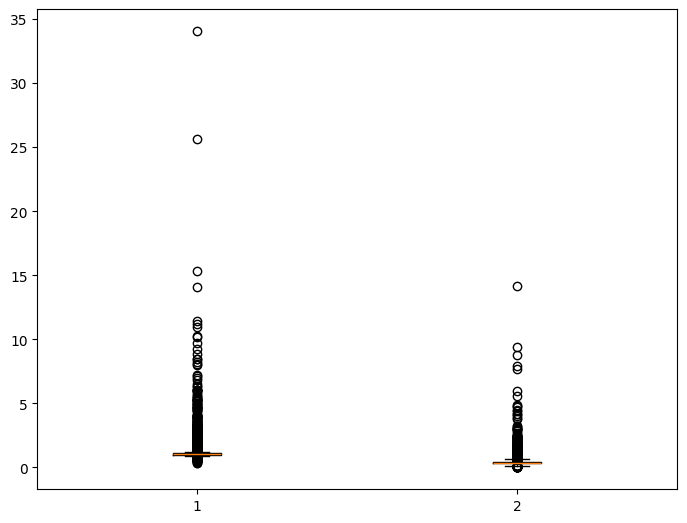

In [ ]:
ratio_data = [room_demo['bedroom/households'], room_demo['bedroom/population']]
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
bg = ax.boxplot(ratio_data)

In [ ]:
room_demo_wo_ocean = room_demo.drop(columns=['ocean_proximity'], axis = 1)
room_demo_wo_ocean = (room_demo_wo_ocean - room_demo_wo_ocean.mean()) / room_demo_wo_ocean.std()
room_demo_wo_ocean

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedroom/population,bedroom/households
0,0.982139,-0.803793,-0.970301,-0.973296,-0.976809,2.345106,2.128767,-0.011027,-0.153859
1,-0.606195,2.042080,1.348243,0.861318,1.670332,2.332575,1.313594,0.235691,-0.262930
2,1.855723,-0.535176,-0.825541,-0.819749,-0.843406,1.782896,1.258152,-0.083195,-0.049603
3,1.855723,-0.623495,-0.718750,-0.765037,-0.733544,0.932947,1.164593,0.073346,-0.050416
4,1.855723,-0.461959,-0.611959,-0.758860,-0.628914,-0.013143,1.172390,0.379290,-0.033567
...,...,...,...,...,...,...,...,...,...
20635,-0.288528,-0.444570,-0.388886,-0.511774,-0.443196,-1.216697,-1.115465,0.161545,0.076183
20636,-0.844446,-0.887535,-0.920466,-0.943292,-1.008198,-0.692027,-1.124128,0.074174,0.459410
20637,-0.923862,-0.175038,-0.125468,-0.368817,-0.173773,-1.143143,-0.992452,0.321961,0.048372
20638,-0.844446,-0.355336,-0.305826,-0.603549,-0.393497,-1.055110,-1.058290,0.611051,0.157229


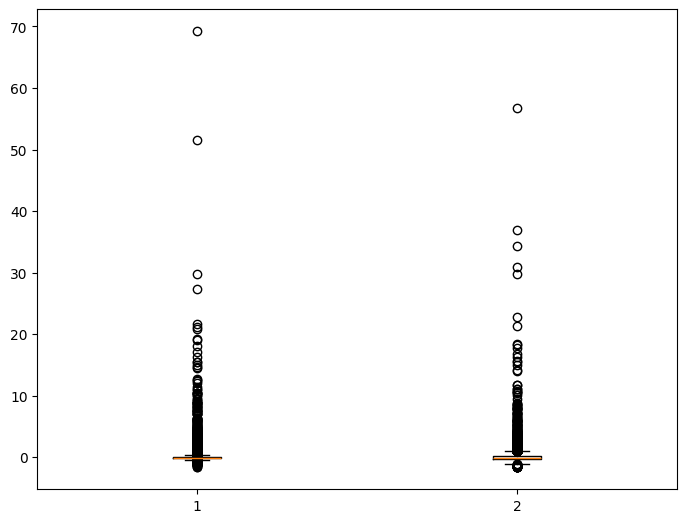

In [ ]:
ratio_data_wo = [room_demo_wo_ocean['bedroom/households'], room_demo_wo_ocean['bedroom/population']]
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
bg = ax.boxplot(ratio_data_wo)

Text(0.5, 1.0, 'Bedroom/population Regplot')

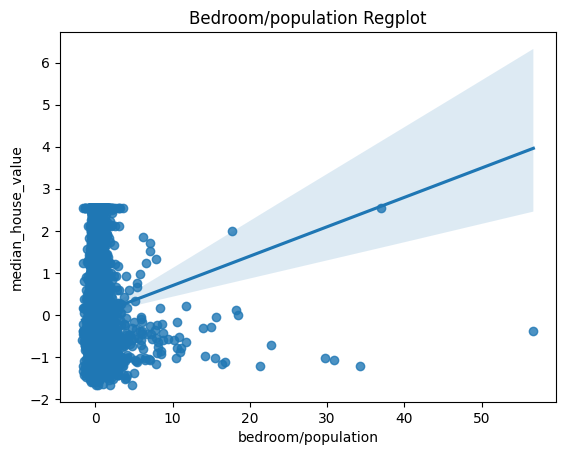

In [ ]:
sns.regplot(data = room_demo_wo_ocean,
            x = 'bedroom/population',
            y = 'median_house_value');
plt.title('Bedroom/population Regplot')

Text(0.5, 1.0, 'Bedroom/households Regplot')

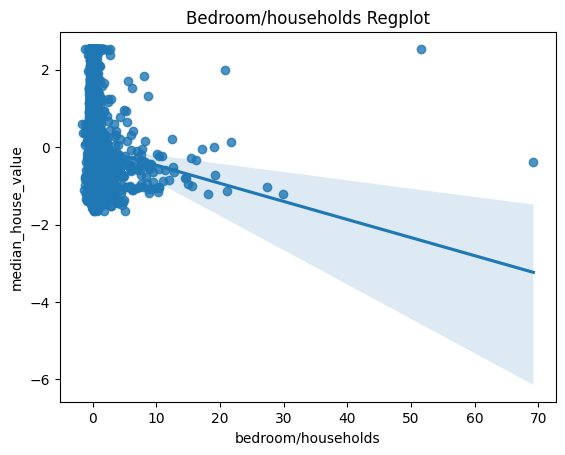

In [ ]:
sns.regplot(data = room_demo_wo_ocean,
            x = 'bedroom/households',
            y = 'median_house_value');
plt.title('Bedroom/households Regplot')

What an interesting dataset!!! So many outliers!!! How should I manipulate it statistically💀💀💀

Alright, the outliers mean there are more bedrooms than people in that suburb

So for the bedroom/population regplot,

Analyse about the population vs household?

In [ ]:
member_per_household = room_demo['population'] / room_demo['households']
member_per_household.describe()

,0
count,20433.000000
mean,3.071533
std,10.438269
min,0.692308
25%,2.429032
50%,2.817582
75%,3.281513
max,1243.333333


In [ ]:
member_per_household

,0
0,2.555556
1,2.109842
2,2.802260
3,2.547945
4,2.181467
...,...
20635,2.560606
20636,3.122807
20637,2.325635
20638,2.123209


In [ ]:
room_demo[(room_demo['population'] / room_demo['households']) == member_per_household.max()]

# This data is in INLAND # This is not due to the Bootstrap

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bedroom/population,bedroom/households
19006,45.0,19.0,5.0,7460.0,6.0,10.2264,137500.0,1,0.00067,0.833333


This suburb has a house shortage that every household could not even have their own house.

#### Handling the outliers
The majority

In [ ]:
# Slice the data that are within 3 sd (outlier theory)
mean_ratio_pop = room_demo['bedroom/population'].mean()
std_ratio_pop = room_demo['bedroom/population'].std()
mean_ratio_hou = room_demo['bedroom/households'].mean()
std_ratio_hou = room_demo['bedroom/households'].std()

room_demo_clear_outlier = room_demo[
    (room_demo['bedroom/population'] >= mean_ratio_pop - 3 * std_ratio_pop) &
    (room_demo['bedroom/population'] <= mean_ratio_pop + 3 * std_ratio_pop) &
    (room_demo['bedroom/households'] >= mean_ratio_hou - 3 * std_ratio_hou) &
    (room_demo['bedroom/households'] <= mean_ratio_hou + 3 * std_ratio_hou)
]

# room_demo_clear_outlier = room_demo_clear_outlier.drop('ocean_proximity', axis=1)
# room_demo_clear_outlier = (room_demo_clear_outlier - room_demo_clear_outlier.mean()) / room_demo_clear_outlier.std()
# room_demo_clear_outlier

Text(0.5, 1.0, 'Bedroom/population Regplot')

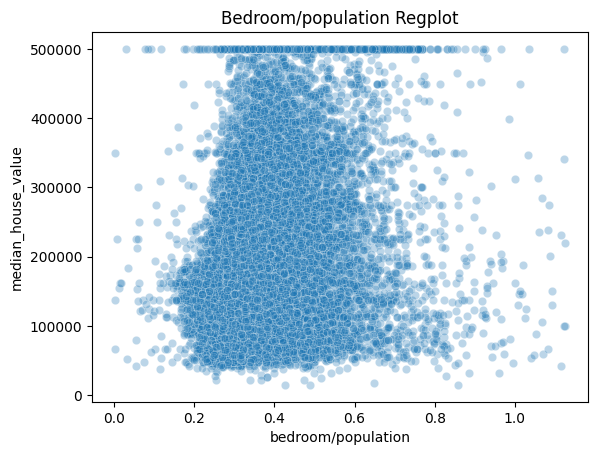

In [ ]:
sns.scatterplot(data = room_demo_clear_outlier,
            x = 'bedroom/population',
            y = 'median_house_value', alpha = 0.3);
plt.title('Bedroom/population Regplot')

From the above plot, we could tell nearly in every household, there are at least two persons sharing a bedroom

Text(0.5, 1.0, 'Bedroom/households Regplot')

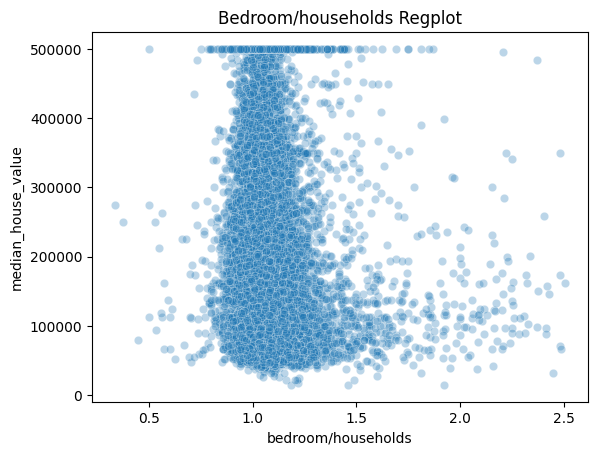

In [ ]:
sns.scatterplot(data = room_demo_clear_outlier,
            x = 'bedroom/households',
            y = 'median_house_value', alpha = 0.3);
plt.title('Bedroom/households Regplot')

From the above plot, we could see most of the houses provide 1 to 1.5 bedroom to each households, no matter how much it is.

# Prediction

In [ ]:
# prepare the training set and testing set

X_train, X_test, Y_train, Y_test = train_test_split(X_descriptive, y_descriptive, train_size=0.8, random_state=1310)

## Classification

In [ ]:
# Random Forest
RFR = RandomForestRegressor(n_estimators=200, max_samples=.5, n_jobs = -1).fit(X_train, Y_train)
Y_RFR_pred = RFR.predict(X_test)
print('R2 score {0}'.format(np.round(r2_score(Y_test, Y_RFR_pred),3)))

R2 score 0.71


## MLP

TensorFlow # make 3 models

### MLP 1 - simplest

In [ ]:
model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation="relu"))

weights = model.get_weights();

model.summary()

In [ ]:
opt = SGD(learning_rate=0.01)
model.compile(loss='mse', optimizer=opt, metrics=["mae"])
history = model.fit(X_train, Y_train, epochs=100,
                    validation_data=(X_test, Y_test), verbose=1, batch_size = 32);

Epoch 1/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.7945 - mae: 0.7195 - val_loss: 0.6151 - val_mae: 0.6474
Epoch 2/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.6184 - mae: 0.6496 - val_loss: 0.5935 - val_mae: 0.6408
Epoch 3/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5871 - mae: 0.6332 - val_loss: 0.5763 - val_mae: 0.6287
Epoch 4/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.5848 - mae: 0.6338 - val_loss: 0.5641 - val_mae: 0.6211
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.5605 - mae: 0.6197 - val_loss: 0.5576 - val_mae: 0.6151
Epoch 6/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5582 - mae: 0.6157 - val_loss: 0.5504 - val_mae: 0.6166
Epoch 7/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.5483 - mae: 0.6141 - val_loss: 0.5429 - val_mae: 0.6090
Epoch 8/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.5436 - mae: 0.6099 - val_loss: 0.5405 - val_mae: 0.6073
Epoch 9/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/

In [ ]:
model.evaluate(X_test, Y_test)

In [ ]:
plt.figure(figsize=(10, 6))

# Plot both loss (MSE) and MAE on the same graph
plt.plot(history.history['loss'], label='Train Loss (MSE)', color='blue', linestyle='dashed')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)', color='blue')

plt.plot(history.history['mae'], label='Train MAE', color='red', linestyle='dashed')
plt.plot(history.history['val_mae'], label='Validation MAE', color='red')

# Labels and title
plt.xlabel('Epochs')
plt.ylabel('Metric Value')
plt.title('Model 1 - Training Progress: Loss (MSE) & MAE')
plt.legend()
plt.grid(True)

plt.show()


### MLP2

In [ ]:
model2 = Sequential()

model2.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model2.add(Dropout(0.3))

model2.add(Dense(64, activation="relu"))
model2.add(Dropout(0.3))

model2.add(Dense(32, activation="relu"))

model2.add(Dense(1, activation="relu"))

weights2 = model2.get_weights();

model2.summary()

In [ ]:
opt = SGD(learning_rate=0.01)
model2.compile(loss='mse', optimizer=opt, metrics=["mae"])
history2 = model2.fit(X_train, Y_train, epochs=100,
                    validation_data=(X_test, Y_test), verbose=1, batch_size = 32);

Epoch 1/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.8212 - mae: 0.7356 - val_loss: 0.6144 - val_mae: 0.6465
Epoch 2/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.6475 - mae: 0.6631 - val_loss: 0.5973 - val_mae: 0.6390
Epoch 3/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6386 - mae: 0.6605 - val_loss: 0.5866 - val_mae: 0.6349
Epoch 4/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.6210 - mae: 0.6513 - val_loss: 0.5785 - val_mae: 0.6310
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6122 - mae: 0.6484 - val_loss: 0.5725 - val_mae: 0.6279
Epoch 6/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6008 - mae: 0.6430 - val_loss: 0.5755 - val_mae: 0.6263
Epoch 7/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6040 - mae: 0.6417 - val_loss: 0.5619 - val_mae: 0.6203
Epoch 8/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5887 - mae: 0.6354 - val_loss: 0.5613 - val_mae: 0.6208
Epoch 9/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/

In [ ]:
model2.evaluate(X_test, Y_test)

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5261 - mae: 0.5957


[0.5230435132980347, 0.5918712019920349]

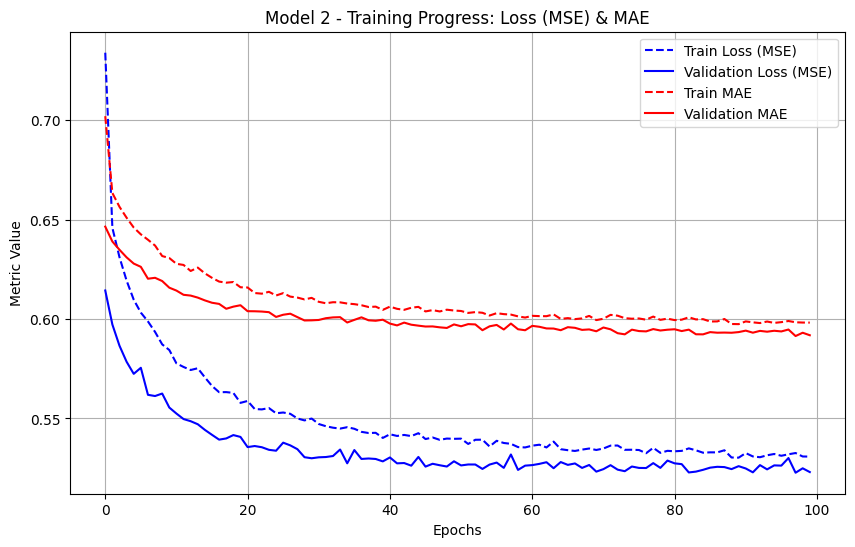

In [ ]:
plt.figure(figsize=(10, 6))

# Plot both loss (MSE) and MAE on the same graph
plt.plot(history2.history['loss'], label='Train Loss (MSE)', color='blue', linestyle='dashed')
plt.plot(history2.history['val_loss'], label='Validation Loss (MSE)', color='blue')

plt.plot(history2.history['mae'], label='Train MAE', color='red', linestyle='dashed')
plt.plot(history2.history['val_mae'], label='Validation MAE', color='red')

# Labels and title
plt.xlabel('Epochs')
plt.ylabel('Metric Value')
plt.title('Model 2 - Training Progress: Loss (MSE) & MAE')
plt.legend()
plt.grid(True)

plt.show()


### MLP 3

In [ ]:
model3 = Sequential()

model3.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model3.add(keras.layers.BatchNormalization())
model3.add(Dropout(0.3))


model3.add(Dense(64, activation="relu"))
model3.add(keras.layers.BatchNormalization())
model3.add(Dropout(0.3))

model3.add(Dense(32, activation="relu"))
model3.add(keras.layers.BatchNormalization())

model3.add(Dense(1, activation="relu"))

weights3 = model3.get_weights();

model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 128)                 │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,289 (48.00 KB)

 Trainable params: 11,841 (46.25 KB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
opt = SGD(learning_rate=0.01)
model3.compile(loss='mse', optimizer=opt, metrics=["mae"])
history3 = model3.fit(X_train, Y_train, epochs=40,
                    validation_data=(X_test, Y_test), verbose=1, batch_size = 32);

Epoch 1/40
511/511 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.8770 - mae: 0.7553 - val_loss: 0.6228 - val_mae: 0.6445
Epoch 2/40
511/511 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.6528 - mae: 0.6633 - val_loss: 0.5797 - val_mae: 0.6234
Epoch 3/40
511/511 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6343 - mae: 0.6605 - val_loss: 0.5745 - val_mae: 0.6215
Epoch 4/40
511/511 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.6159 - mae: 0.6445 - val_loss: 0.5760 - val_mae: 0.6223
Epoch 5/40
511/511 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.5970 - mae: 0.6413 - val_loss: 0.5610 - val_mae: 0.6147
Epoch 6/40
511/511 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6006 - mae: 0.6408 - val_loss: 0.5592 - val_mae: 0.6129
Epoch 7/40
511/511 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.6072 - mae: 0.6446 - val_loss: 0.5513 - val_mae: 0.6121
Epoch 8/40
511/511 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5929 - mae: 0.6378 - val_loss: 0.5512 - val_mae: 0.6104
Epoch 9/40
511/511 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - lo

In [ ]:
model3.evaluate(X_test, Y_test)

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5442 - mae: 0.6079


[0.539787769317627, 0.6026575565338135]

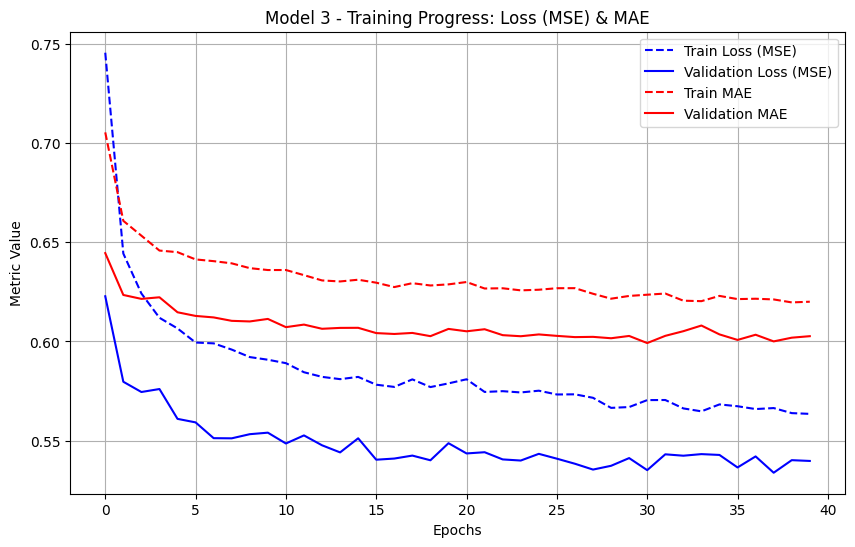

In [ ]:
plt.figure(figsize=(10, 6))

# Plot both loss (MSE) and MAE on the same graph
plt.plot(history3.history['loss'], label='Train Loss (MSE)', color='blue', linestyle='dashed')
plt.plot(history3.history['val_loss'], label='Validation Loss (MSE)', color='blue')

plt.plot(history3.history['mae'], label='Train MAE', color='red', linestyle='dashed')
plt.plot(history3.history['val_mae'], label='Validation MAE', color='red')

# Labels and title
plt.xlabel('Epochs')
plt.ylabel('Metric Value')
plt.title('Model 3 - Training Progress: Loss (MSE) & MAE')
plt.legend()
plt.grid(True)

plt.show()


There is obviously larger gap between the training and validation data in Model 3.\
Both 3 models have the similar MSE and MAE, while Model 1 provides the smallest gap.\
So I calim Model 1 provide the best performance in between.

In [ ]:
opt = SGD(learning_rate=0.01)
model.compile(loss='mse', optimizer=opt, metrics=["accuracy"])
history = model.fit(X_train, Y_train, epochs=100,
                    validation_data=(X_test, Y_test), verbose=1, batch_size = 32);
model.evaluate(X_test, Y_test)

Epoch 1/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0000e+00 - loss: 0.5188 - val_accuracy: 0.0000e+00 - val_loss: 0.5192
Epoch 2/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0000e+00 - loss: 0.5145 - val_accuracy: 0.0000e+00 - val_loss: 0.5203
Epoch 3/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0000e+00 - loss: 0.5196 - val_accuracy: 0.0000e+00 - val_loss: 0.5186
Epoch 4/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0000e+00 - loss: 0.5195 - val_accuracy: 0.0000e+00 - val_loss: 0.5216
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0000e+00 - loss: 0.5117 - val_accuracy: 0.0000e+00 - val_loss: 0.5215
Epoch 6/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0000e+00 - loss: 0.5178 - val_accuracy: 0.0000e+00 - val_loss: 0.5281
Epoch 7/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0000e+00 - loss: 0.5212 - val_accuracy: 0.0000e+00 - val_loss: 0.5200
Epoch 8/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 

[0.5169503688812256, 0.0]

However, if we look into the accuracy, it is said to be 0. So the model is actually not working.\
And the Random Forest model definitely do better job.

## LSTM

In [ ]:
# Reshape for LSTM: (samples, time steps, features)
X_train_exp = np.expand_dims(X_train.values, axis=1)  # Adding a time-step dimension
X_test_exp = np.expand_dims(X_test.values, axis=1)

# Define LSTM model
lstm_model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(1, X_train.shape[1])),
    BatchNormalization(),
    Dropout(0.3),

    LSTM(64, return_sequences=False),  # LAST LSTM should NOT return sequences
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    Dropout(0.3),

    Dense(1)  # Output layer for regression
])

# Compile model
lstm_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train model
history_lstm = lstm_model.fit(X_train_exp, Y_train, validation_data=(X_test_exp, Y_test), epochs=50, batch_size=32, verbose=1)

# Evaluate model
test_loss, test_mae = lstm_model.evaluate(X_test_exp, Y_test, verbose=0)
test_loss, test_mae


Epoch 1/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 1.3198 - mae: 0.8699 - val_loss: 0.5463 - val_mae: 0.5502
Epoch 2/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.5192 - mae: 0.5437 - val_loss: 0.3246 - val_mae: 0.4157
Epoch 3/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.4219 - mae: 0.4833 - val_loss: 0.3294 - val_mae: 0.4183
Epoch 4/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.4010 - mae: 0.4648 - val_loss: 0.2970 - val_mae: 0.3838
Epoch 5/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.3875 - mae: 0.4567 - val_loss: 0.3019 - val_mae: 0.3825
Epoch 6/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.3792 - mae: 0.4480 - val_loss: 0.2954 - val_mae: 0.3816
Epoch 7/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.3715 - mae: 0.4450 - val_loss: 0.2924 - val_mae: 0.3794
Epoch 8/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.3773 - mae: 0.4449 - val_loss: 0.2872 - val_mae: 0.3804
Epoch 9/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step

(0.26491209864616394, 0.35577690601348877)

I think the error happens because of the version of the TensorFlow in this server.

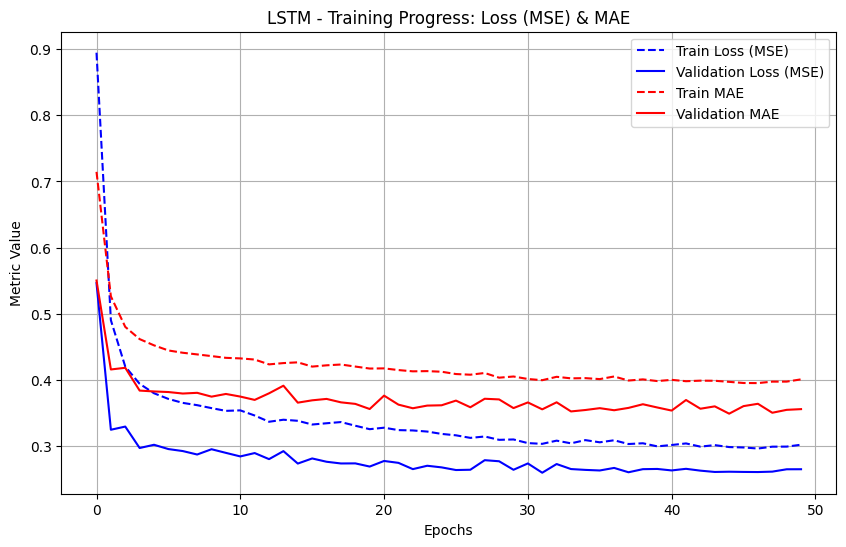

In [ ]:
plt.figure(figsize=(10, 6))

# Plot both loss (MSE) and MAE on the same graph
plt.plot(history_lstm.history['loss'], label='Train Loss (MSE)', color='blue', linestyle='dashed')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss (MSE)', color='blue')

plt.plot(history_lstm.history['mae'], label='Train MAE', color='red', linestyle='dashed')
plt.plot(history_lstm.history['val_mae'], label='Validation MAE', color='red')

# Labels and title
plt.xlabel('Epochs')
plt.ylabel('Metric Value')
plt.title('LSTM - Training Progress: Loss (MSE) & MAE')
plt.legend()
plt.grid(True)

plt.show()


## Explainable AI

### Explaining the Random Forest Regressor

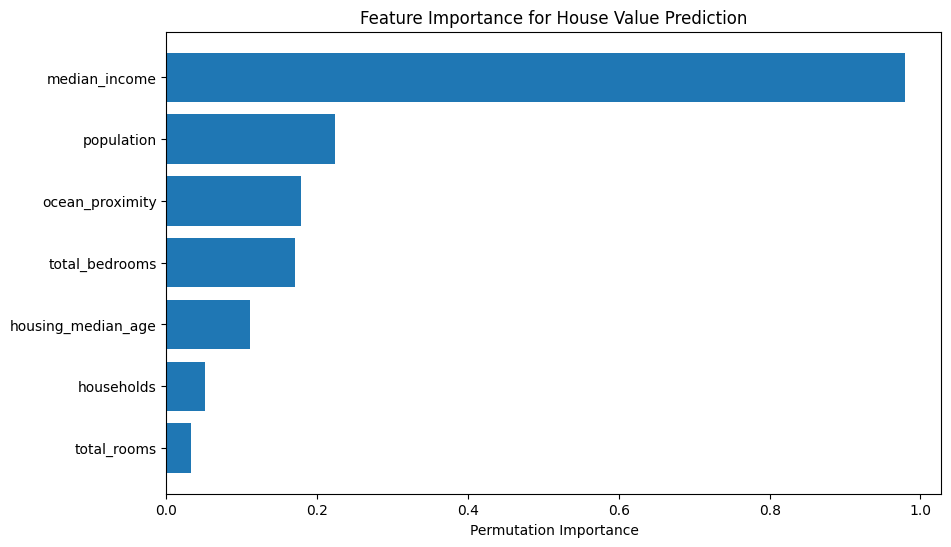

In [ ]:
from sklearn.inspection import permutation_importance

# Compute permutation importance
perm_importance = permutation_importance(RFR, X_test, Y_test, n_repeats=10, random_state=1310)

# Plot results

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10, 6))
plt.barh(X_descriptive.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance for House Value Prediction")
plt.show()


The magnitude of the feature importance could be found above, from the Regression Analysis

### Explain the LSTM

In [ ]:
import shap
import numpy as np

# Create a SHAP explainer using DeepExplainer (TensorFlow/Keras models)
# explainer = shap.Explainer(lstm_model, X_train_exp)
explainer = shap.DeepExplainer(lstm_model, X_train_exp)


# Compute SHAP values
# shap_values = explainer(X_test_exp[:100])  # Sample 100 instances for efficiency
shap_values = explainer.shap_values(X_test_exp[:100])  # Sample 100 instances for efficiency


# Plot feature importance
shap.summary_plot(shap_values, X_test_exp[:100], feature_names=X_descriptive.columns)


StagingError: in user code:

    File "/usr/local/lib/python3.11/dist-packages/shap/explainers/_deep/deep_tf.py", line 269, in grad_graph  *
        x_grad = tape.gradient(out, shap_rAnD)

    LookupError: gradient registry has no entry for: shap_CudnnRNNV3


# Test Running time

### Ocean Section Analysis

In [ ]:
%%timeit

# Hardcode
near_bay = cal[cal['ocean_proximity'] == 'NEAR BAY']


near_bay = near_bay.drop(columns=['longitude', 'latitude', 'ocean_proximity'], axis = 1)


n_bootstrap = 10000  # Number of bootstrap samples
bootstrap_means = []

# Perform bootstrap resampling
for _ in range(n_bootstrap):
    sample = near_bay.sample(frac=1, replace=True)  # Resample with replacement
    bootstrap_means.append(sample.mean())

# Convert results to DataFrame
near_bay_bootstrap_means_df = pd.DataFrame(bootstrap_means)


X_near_bay = near_bay_bootstrap_means_df.drop(columns=['median_income'], axis = 1)
y_near_bay = near_bay_bootstrap_means_df['median_income']

X_near_bay = z_scaler.fit_transform(X_near_bay)
regression_model.fit(X_near_bay, y_near_bay)
print(regression_model.coef_)


[-0.008233    0.04148782 -0.04469144 -0.00555796  0.00564606  0.02400584]
[-0.00869023  0.04155978 -0.04145541 -0.00452507  0.001552    0.02407961]
[-0.00813585  0.0430202  -0.04464595 -0.00477551  0.00358954  0.02348084]
[-0.0085194   0.04326767 -0.0422728  -0.00446002  0.00051633  0.02397205]
[-0.008784    0.04231427 -0.0423201  -0.00512558  0.00241961  0.02414165]
[-0.00874279  0.04250586 -0.04635848 -0.00454413  0.00592022  0.0240298 ]
[-0.00900332  0.04267371 -0.04976815 -0.00576892  0.01037775  0.02410262]
[-0.00856182  0.04284287 -0.04558074 -0.00505695  0.00549742  0.02377167]
7.23 s ± 4.37 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%%timeit
# using a Class

class ocean_approximity_analysis:
    def __init__(self, dataset, area:str, n_bootstrap: int):
        self.dataset = dataset
        self.area = area
        self.n_bootstrap = n_bootstrap

    def prepare_dataset(self):
        df = self.dataset
        Area = self.area
        df = df[df['ocean_proximity'] == Area]
        df = df.drop(columns=['longitude', 'latitude', 'ocean_proximity'], axis = 1)
        return df

    def bootstrap(self):
        bootstrap_means = []
        df = self.prepare_dataset()
        for _ in range(self.n_bootstrap):
            sample = df.sample(frac=1, replace=True)  # Resample with replacement
            bootstrap_means.append(sample.mean())
        result_df = pd.DataFrame(bootstrap_means)
        return result_df

    def Regression_Analysis(self):
        resul_df = self.bootstrap()
        X_boot = resul_df.drop(columns=['median_income'], axis = 1)
        y_boot = resul_df['median_income']

        z_scaler = StandardScaler()
        X_boot = z_scaler.fit_transform(X_boot)

        regression_model = LinearRegression()
        regression_model.fit(X_boot, y_boot)
        return print(regression_model.coef_)


near_bay = ocean_approximity_analysis(cal, 'NEAR BAY', 10000)
near_bay.prepare_dataset()
near_bay.bootstrap()
near_bay.Regression_Analysis()

[-0.00882698  0.04200274 -0.04284842 -0.00395011  0.00179225  0.02465028]
[-0.00851683  0.04182734 -0.0413468  -0.00480805  0.00190349  0.02381153]
[-0.00853239  0.04245861 -0.0418737  -0.0038138   0.0005959   0.02431748]
[-0.00831193  0.04297285 -0.04997756 -0.00637743  0.01071081  0.02338096]
[-0.00889371  0.04116838 -0.05241565 -0.0060037   0.01492606  0.02395334]
[-0.0090309   0.04191075 -0.04417027 -0.00419858  0.00358267  0.02456363]
[-0.00869108  0.04297154 -0.05036806 -0.00589709  0.01078915  0.02293145]
[-0.00888708  0.04193289 -0.04486577 -0.00600886  0.00621019  0.02386705]
10.6 s ± 1.06 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%%timeit
# using a function

def ocean_approximity_analysis2(dataset, area:str, n_bootstrap:int):
    df = dataset[dataset['ocean_proximity'] == area]
    df = df.drop(columns=['longitude', 'latitude', 'ocean_proximity'], axis = 1)

    bootstrap_means = []

    for _ in range(n_bootstrap):
        sample = df.sample(frac=1, replace=True)  # Resample with replacement
        bootstrap_means.append(sample.mean())
    result_df = pd.DataFrame(bootstrap_means)

    X_boot = result_df.drop(columns=['median_income'], axis = 1)
    y_boot = result_df['median_income']

    X_boot = z_scaler.fit_transform(X_boot)

    regression_model.fit(X_boot, y_boot)
    return print(regression_model.coef_)

ocean_approximity_analysis2(cal, 'NEAR BAY', 10000)

[-0.00855035  0.04268901 -0.04290478 -0.00435047  0.00214761  0.02360583]
[-0.00862403  0.04129842 -0.04586503 -0.00384094  0.00566663  0.02370393]
[-0.00900519  0.0434462  -0.04313423 -0.00539163  0.00252925  0.02347022]
[-0.0081982   0.04215649 -0.04900499 -0.00536292  0.00992735  0.02331391]
[-0.00829341  0.04142788 -0.04693813 -0.00546841  0.00797162  0.02417213]
[-0.00895294  0.04235689 -0.0458287  -0.00519597  0.00564682  0.02386265]
[-0.00897214  0.04274358 -0.04371929 -0.00556921  0.00380264  0.02384108]
[-0.00850699  0.04189061 -0.04246145 -0.00452922  0.0022141   0.02363109]
4.81 s ± 542 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
